# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

___All the outcomes and understandings are written in <font color= green> GREEN</font>___

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 : Loading and Cleaning Data

##  1.1  Import Data 

In [4]:
# Loading the data using Pandas
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1.2 Inspect the dataframe
This helps to give a good idea of the dataframes.

In [5]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#To get the idea of how the table looks like we can use .head() or .tail() command
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# The .shape code gives the no. of rows and columns
df.shape

(9240, 37)

In [8]:
#To get an idea of the numeric values, use .describe()
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1.3 Cleaning the dataframe

In [9]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [10]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
# Removing all the columns that are no required and have 35% null values
df2 = df.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)
df2.head()
#,'Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,interested in other courses,low in relevance,no,no,select,select,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,ringing,NaN,no,no,select,select,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,will revert after reading the email,might be,no,no,potential lead,mumbai,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,ringing,not sure,no,no,select,mumbai,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,will revert after reading the email,might be,no,no,select,mumbai,no,no,modified


In [13]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

<font color= green>___There is a huge value of null variables in 9 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'unknown'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.___</font>

In [14]:
df2.dropna(subset=['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity'], inplace=True)
# Let's recheck the .shape code gives the no. of rows and columns
df2.shape

(9074, 33)

In [15]:
# Let's recheck the .shape code gives the no. of rows and columns
df2.shape

(9074, 33)

### 2.1 Handle null value

#### Lead Quality Column

In [16]:
# replace null values in Lead quality column by 'unknown'
df2['Lead Quality'].fillna('unknown',inplace = True)
# see unique value in Lead quality column after replacing null value
df2['Lead Quality'].value_counts()

Lead Quality
unknown              4720
might be             1519
not sure             1086
worst                 601
high in relevance     592
low in relevance      556
Name: count, dtype: int64

#### Tags column 

In [17]:
# Let's replace null values in Tags column by 'unknown'
df2['Tags'].fillna('unknown',inplace = True)
# Let's see unique value in Tags column after replacing null value
df2['Tags'].value_counts()

Tags
unknown                                              3327
will revert after reading the email                  2016
ringing                                              1187
interested in other courses                           509
already a student                                     465
closed by horizzon                                    301
switched off                                          240
busy                                                  185
lost to eins                                          172
not doing further education                           145
interested  in full time mba                          116
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch 

In [18]:
# Let's filter values with count >= 100
tags_count = df2['Tags'].value_counts()
filter_tags_count = tags_count[tags_count >= 100].index
filter_tags_count

Index(['unknown', 'will revert after reading the email', 'ringing',
       'interested in other courses', 'already a student',
       'closed by horizzon', 'switched off', 'busy', 'lost to eins',
       'not doing further education', 'interested  in full time mba',
       'graduation in progress'],
      dtype='object', name='Tags')

In [19]:
# Let's replace rare values by 'others'
df2['Tags'] = df2['Tags'].apply(lambda x: x if x in filter_tags_count else 'Other')
# Let's see unique value in Tags column after replacing rare values by 'others' value
df2['Tags'].value_counts()

Tags
unknown                                3327
will revert after reading the email    2016
ringing                                1187
interested in other courses             509
already a student                       465
closed by horizzon                      301
Other                                   300
switched off                            240
busy                                    185
lost to eins                            172
not doing further education             145
interested  in full time mba            116
graduation in progress                  111
Name: count, dtype: int64

#### Lead Profile column

In [20]:
# Let's replace 'Select' by 'unknown'
df2['Lead Profile'] = df2['Lead Profile'].replace('Select','unknown')
# Let's replace 'null' by 'unknown'
df2['Lead Profile'] = df2['Lead Profile'].fillna('unknown')
# Let's see unique value in Lead Profile column after replacing value
df2['Lead Profile'].value_counts()

Lead Profile
select                         4055
unknown                        2702
potential lead                 1554
other leads                     482
student of someschool           240
lateral student                  21
dual specialization student      20
Name: count, dtype: int64

In [21]:
# see unique value in these column
print (df2['What matters most to you in choosing a course'].value_counts())
print ('*'*20)
print (df2['What is your current occupation'].value_counts())
print ('*'*20)
print (df2['How did you hear about X Education'].value_counts())

What matters most to you in choosing a course
better career prospects      6370
flexibility & convenience       1
other                           1
Name: count, dtype: int64
********************
What is your current occupation
unemployed              5476
working professional     677
student                  206
other                     15
housewife                  9
businessman                8
Name: count, dtype: int64
********************
How did you hear about X Education
select                   4886
online search             808
word of mouth             347
student of someschool     310
other                     186
multiple sources          152
advertisements             70
social media               66
email                      26
sms                        23
Name: count, dtype: int64


In [22]:
# see count of null values in these column
print ('null value of What matters most to you in choosing a course is',df2['What matters most to you in choosing a course'].isnull().sum())
print ('*'*20)
print ('null value of What is your current occupation is',df2['What is your current occupation'].isnull().sum())
print ('*'*20)
print ('null value of How did you hear about X Education is',df2['How did you hear about X Education'].isnull().sum())

null value of What matters most to you in choosing a course is 2702
********************
null value of What is your current occupation is 2683
********************
null value of How did you hear about X Education is 2200


In [23]:
#Replace null values of 'What matters most to you in choosing a course' column by mode value as the mode
mode_value = df2['What matters most to you in choosing a course'].mode()[0]
df2['What matters most to you in choosing a course'].fillna(mode_value, inplace=True)
# see unique value of the column after replacing value
df2['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
better career prospects      9072
flexibility & convenience       1
other                           1
Name: count, dtype: int64

In [24]:
#Replace null values of 'What is your current occupation' column by 'unknown'
df2['What is your current occupation'].fillna('unknown', inplace=True)
# see unique value of the column after replacing value
df2['What is your current occupation'].value_counts()

What is your current occupation
unemployed              5476
unknown                 2683
working professional     677
student                  206
other                     15
housewife                  9
businessman                8
Name: count, dtype: int64

In [25]:
#Replace null values and 'Select' value in 'How did you hear about X Education' column by 'unknown'
# replace 'Select' by 'unknown'
df2['How did you hear about X Education'] = df2['How did you hear about X Education'].replace('Select','unknown')
# replace 'null' by 'unknown'
df2['How did you hear about X Education'] = df2['How did you hear about X Education'].fillna('unknown')
# see unique value of the column after replacing value
df2['How did you hear about X Education'].value_counts()

How did you hear about X Education
select                   4886
unknown                  2200
online search             808
word of mouth             347
student of someschool     310
other                     186
multiple sources          152
advertisements             70
social media               66
email                      26
sms                        23
Name: count, dtype: int64

#### Country, City & Specialization columns

In [26]:
# see unique value & null in these column
print (df2['Country'].value_counts())
print (df2['Country'].isnull().sum())
print ('*'*20)
print (df2['City'].value_counts())
print (df2['City'].isnull().sum())
print ('*'*20)
print (df2['Specialization'].value_counts())
print (df2['Specialization'].isnull().sum())


Country
india                   6491
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malays

In [27]:
# Replace null values in Country by 'unknown'
df2['Country'] = df2['Country'].fillna('unknown')
# see unique value of the column after replacing value
df2['Country'].value_counts()

Country
india                   6491
unknown                 2301
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
asia/pacific region        2
italy                      2
uganda                     2
bangladesh                 2
netherlands                2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland                1
denmar

In [28]:
# Group values with a frequency of less than 10 into "others" to simplify the values in the Country column and avoid unnecessary complexity when building the model
contry_count = df2['Country'].value_counts()
top_country_count = contry_count[contry_count >= 10].index
# replace rare values by 'others'
df2['Country'] = df2['Country'].apply(lambda x: x if x in top_country_count else 'Other')
# see unique value in Tags column after replacing rare values by 'others' value
df2['Country'].value_counts()

Country
india                   6491
unknown                 2301
Other                     77
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
Name: count, dtype: int64

In [29]:
# Replace null values and 'Select' value in City by 'unknown'
# replace 'Select' by 'unknown'
df2['City'] = df2['City'].replace('Select','unknown')
# replace 'null' by 'unknown'
df2['City'] = df2['City'].fillna('unknown')
# see unique value of the column after replacing value
df2['City'].value_counts()

City
mumbai                         3177
select                         2156
unknown                        1419
thane & outskirts               745
other cities                    680
other cities of maharashtra     446
other metro cities              377
tier ii cities                   74
Name: count, dtype: int64

In [30]:
# Replace null values and 'Select' value in Specialization by 'unknown'
# replace 'Select' by 'unknown'
df2['Specialization'] = df2['Specialization'].replace('Select','unknown')
# replace 'null' by 'unknown'
df2['Specialization'] = df2['Specialization'].fillna('unknown')
# see unique value of the column after replacing value
df2['Specialization'].value_counts()

Specialization
select                               1851
unknown                              1431
finance management                    959
human resource management             837
marketing management                  823
operations management                 499
business administration               399
it projects management                366
supply chain management               346
banking, investment and insurance     335
travel and tourism                    202
media and advertising                 202
international business                176
healthcare management                 156
e-commerce                            111
hospitality management                111
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: count, dtype: int64

### 2.2 Data pre-processing for model building

#### Remove no information columns

In [31]:
print(df2['Magazine'].value_counts())
print(df2['Receive More Updates About Our Courses'].value_counts())
print(df2['Update me on Supply Chain Content'].value_counts())
print(df2['Get updates on DM Content'].value_counts())
print(df2['I agree to pay the amount through cheque'].value_counts())

Magazine
no    9074
Name: count, dtype: int64
Receive More Updates About Our Courses
no    9074
Name: count, dtype: int64
Update me on Supply Chain Content
no    9074
Name: count, dtype: int64
Get updates on DM Content
no    9074
Name: count, dtype: int64
I agree to pay the amount through cheque
no    9074
Name: count, dtype: int64


Columns like *Magazine*, *Receive More Updates About Our Courses*, and similar ones have only one unique value ("No"), offering no variance or predictive power. Additionally, *Prospect ID*, *Lead Number*, and *A free copy of Mastering The Interview* are irrelevant to the model. Removing these columns simplifies the dataset without affecting accuracy.

In [32]:
# Drop these columns
cols_to_drop = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content' ,'I agree to pay the amount through cheque']
df2 = df2.drop(cols_to_drop,axis = 1)
df2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,no,no,no,interested in other courses,low in relevance,select,select,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,no,no,no,ringing,unknown,select,select,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,no,no,no,will revert after reading the email,might be,potential lead,mumbai,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,no,no,no,ringing,not sure,select,mumbai,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,no,no,no,will revert after reading the email,might be,select,mumbai,no,modified


In [33]:
df_final = df2.drop(columns = ['Prospect ID', 'Lead Number', 'A free copy of Mastering The Interview'],axis = 1)
df_final.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,unknown,...,no,no,no,no,no,interested in other courses,low in relevance,select,select,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,no,no,no,no,no,ringing,unknown,select,select,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,no,no,no,no,no,will revert after reading the email,might be,potential lead,mumbai,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,no,no,no,no,no,ringing,not sure,select,mumbai,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,no,no,no,no,no,will revert after reading the email,might be,select,mumbai,modified


In [34]:
# Checking the value counts in all remaining columns helps identify which values can be grouped together
# reducing the number of variables created after applying get_dummies().
for col in df_final.columns:
    print(f"Value counts for column: {col}")
    print(df_final[col].value_counts())
    print("-" * 50) 

Value counts for column: Lead Origin
Lead Origin
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Lead Source
Lead Source
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Do Not Email
Do Not Email
no     8358
yes     716
Name: count, dtype: int64

Categories in *Lead Source*, *Last Activity*, *Specialization*, and *Last Notable Activity* with fewer than 100 occurrences should be grouped as "Others" to simplify the dataset. This reduces variables after *get_dummies()*, improving model efficiency.

In [35]:
col_to_group = ['Lead Source', 'Last Activity', 'Specialization', 'Last Notable Activity','How did you hear about X Education','What is your current occupation','Country']
# Group values with a frequency of less than 10 into "others" to simplify the values in the Country column and avoid unnecessary complexity when building the model
for i in col_to_group:
    column_value_count = df_final[i].value_counts()
    top_value_count = column_value_count[column_value_count >= 100].index
    df_final[i] = df_final[i].apply(lambda x: x if x in top_value_count else 'Other')
    df_final[i].value_counts()

In [36]:
# Checking the value counts in all remaining columns helps identify which values can be grouped together
# reducing the number of variables created after applying get_dummies().
for col in df_final.columns:
    print(f"Value counts for column: {col}")
    print(df_final[col].value_counts())
    print("-" * 50) 

Value counts for column: Lead Origin
Lead Origin
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Lead Source
Lead Source
google              2873
direct traffic      2543
olark chat          1753
organic search      1154
reference            443
welingak website     129
referral sites       125
Other                 54
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Do Not Email
Do Not Email
no     8358
yes     716
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Do Not Call
Do Not Call
no     9072
yes       2
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Converted
Converted
0    5639
1    3435
Name: count, dtype: int64
---------------------------

## EDA

#### 2.1.1. Categorical Variables

In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

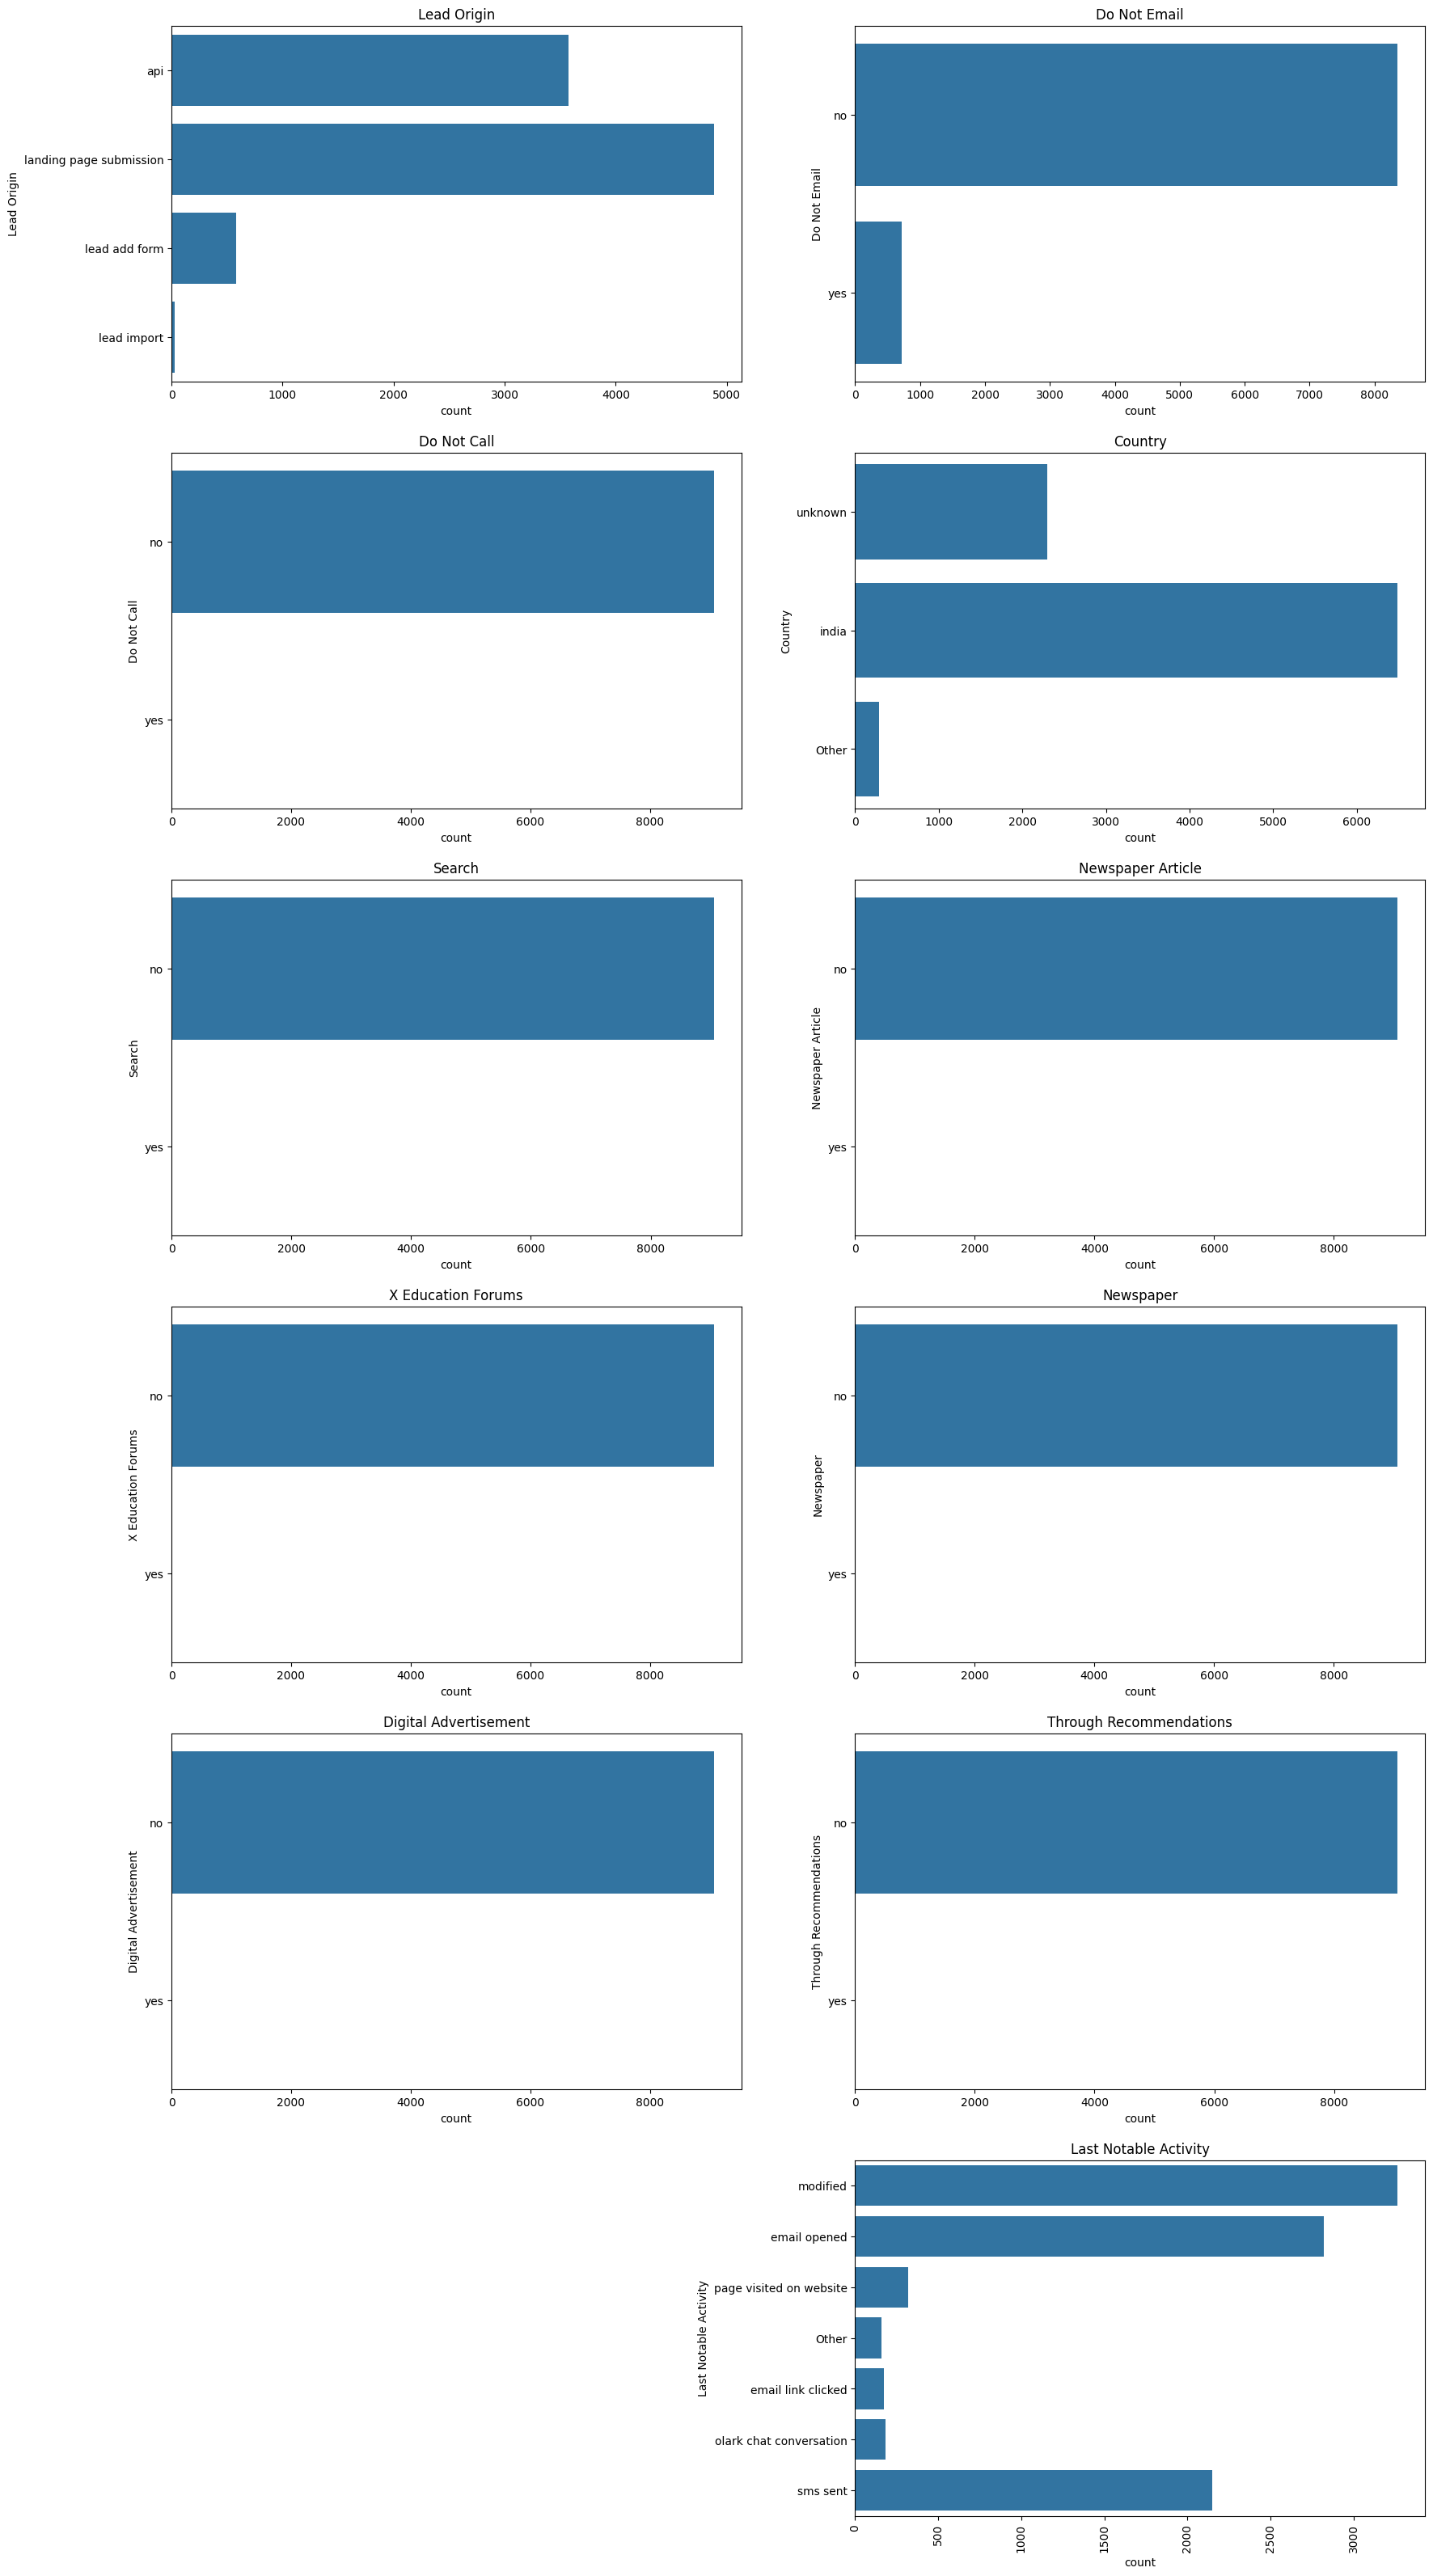

In [38]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,12)
sns.countplot(df_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

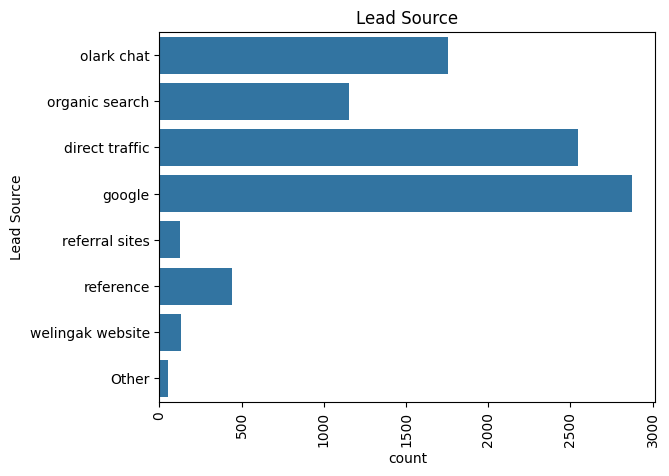

In [39]:
sns.countplot(df_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

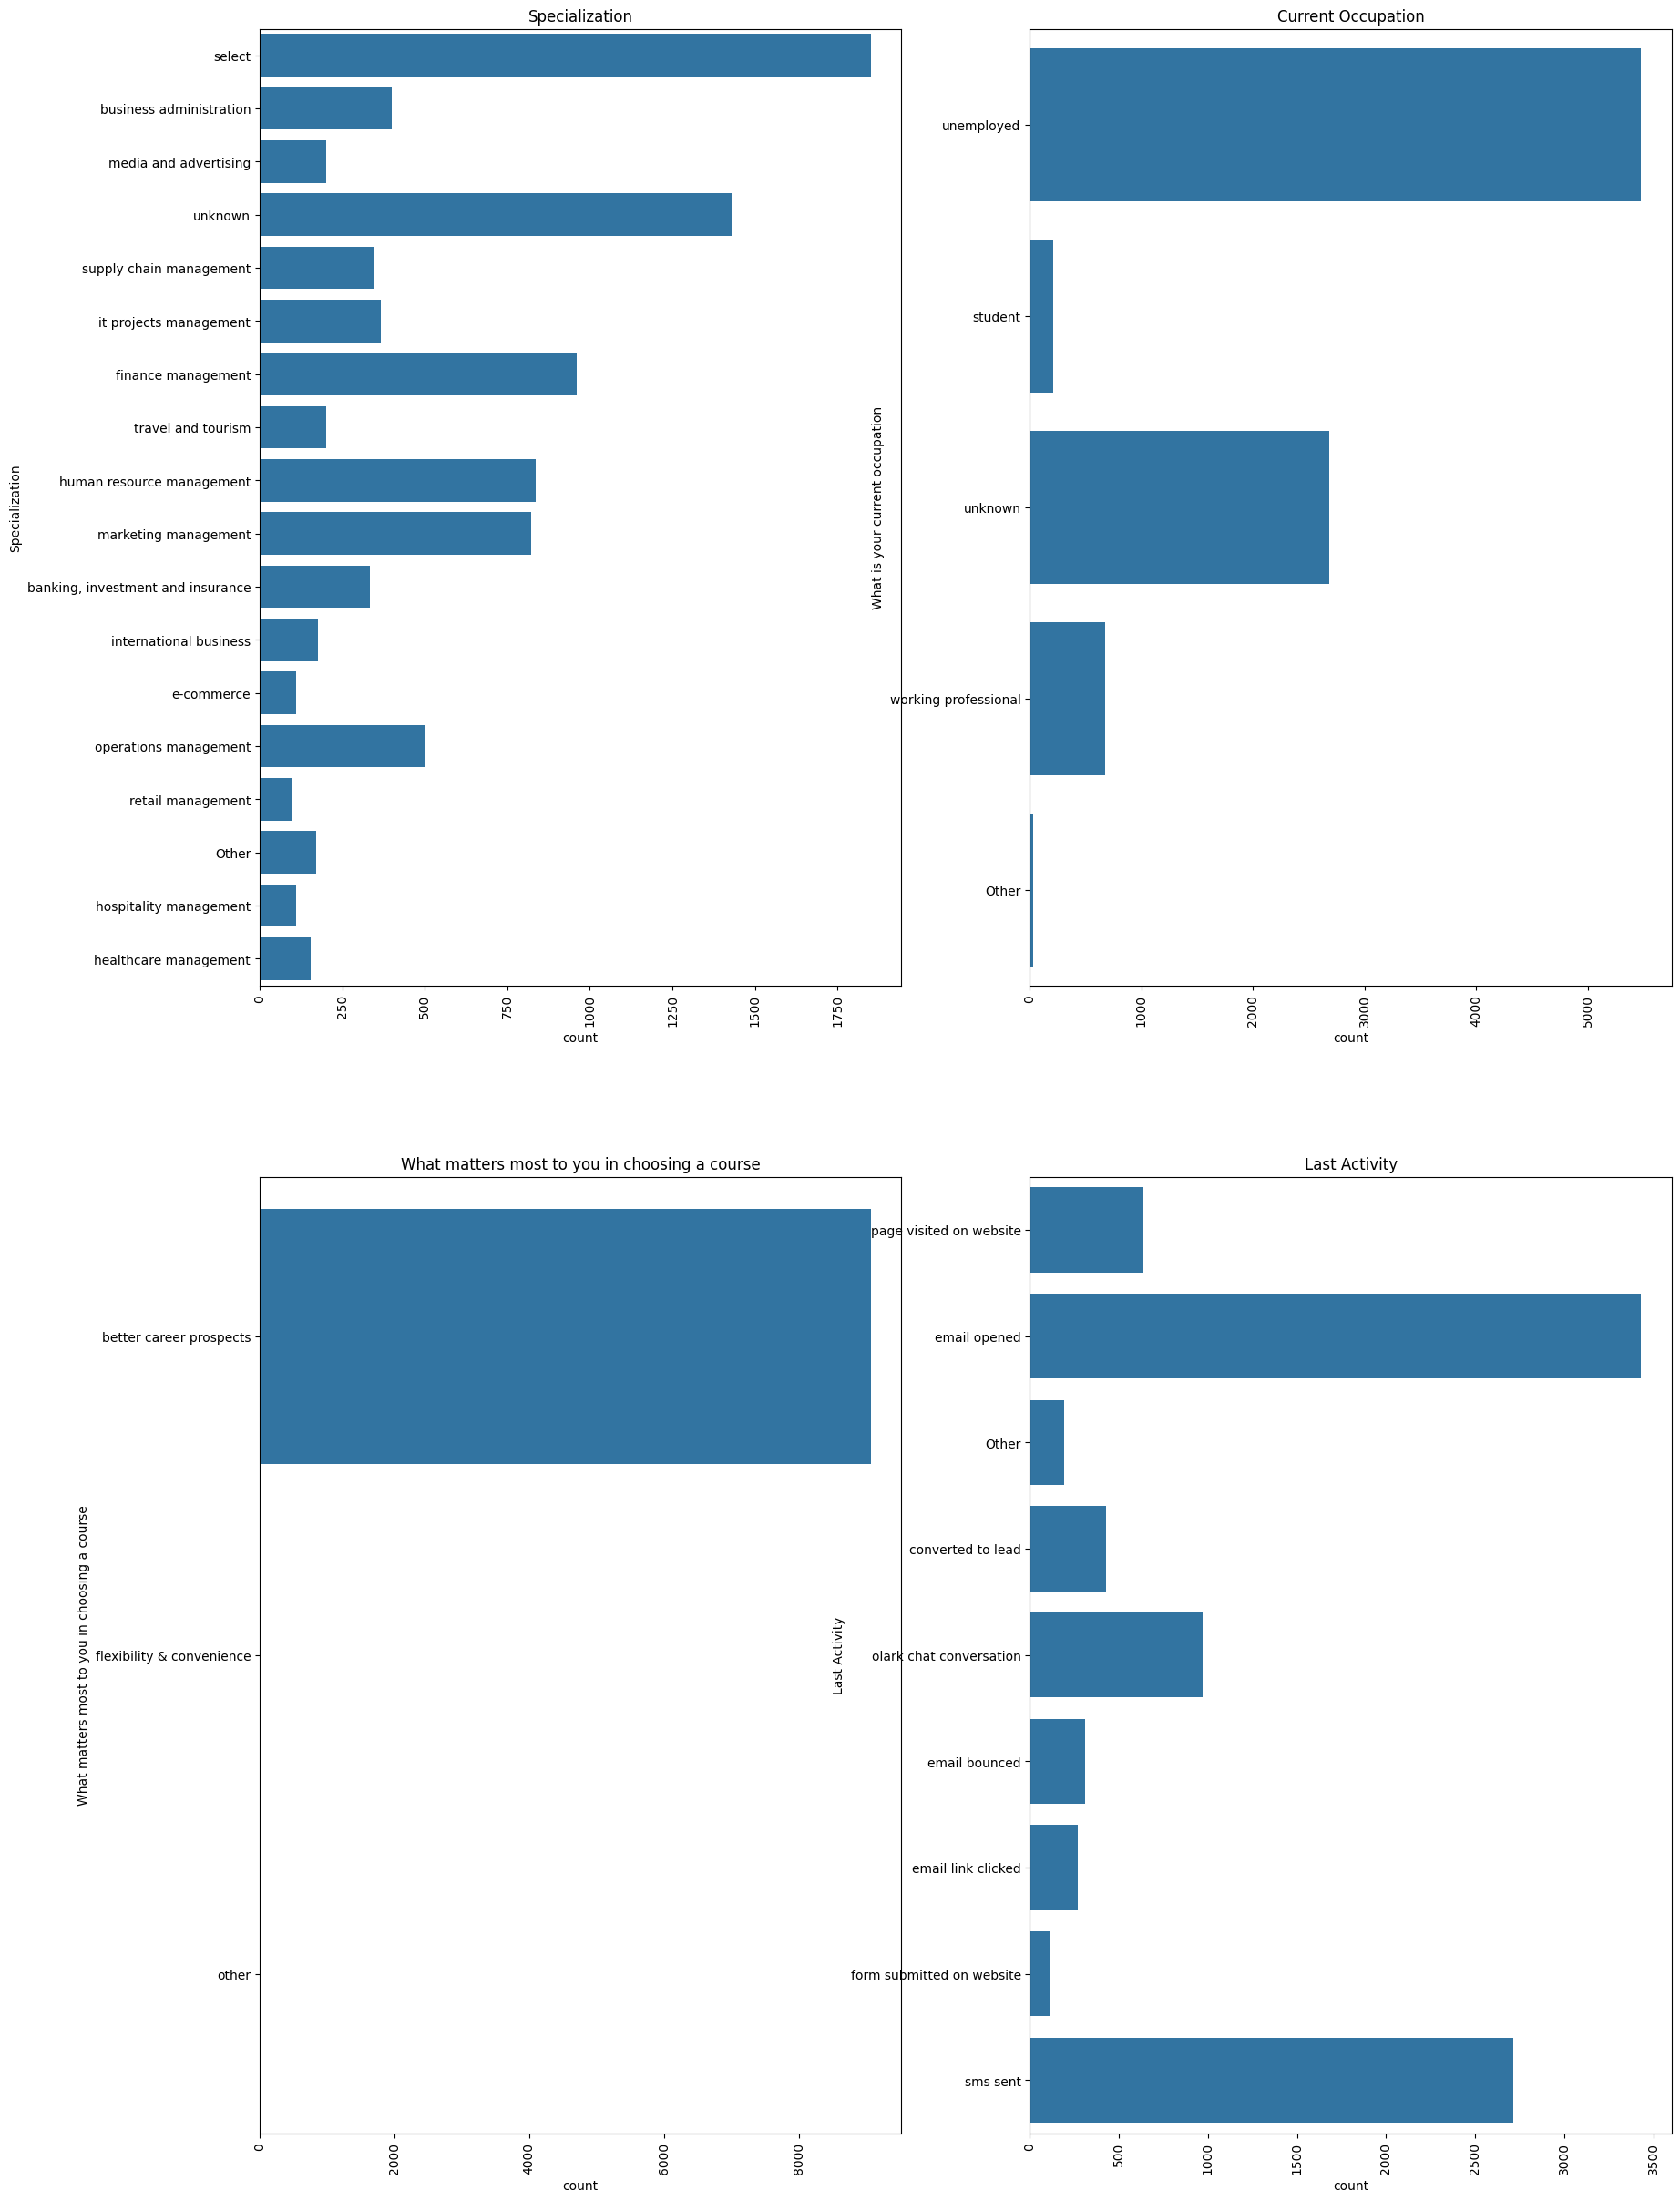

In [40]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(df_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(df_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

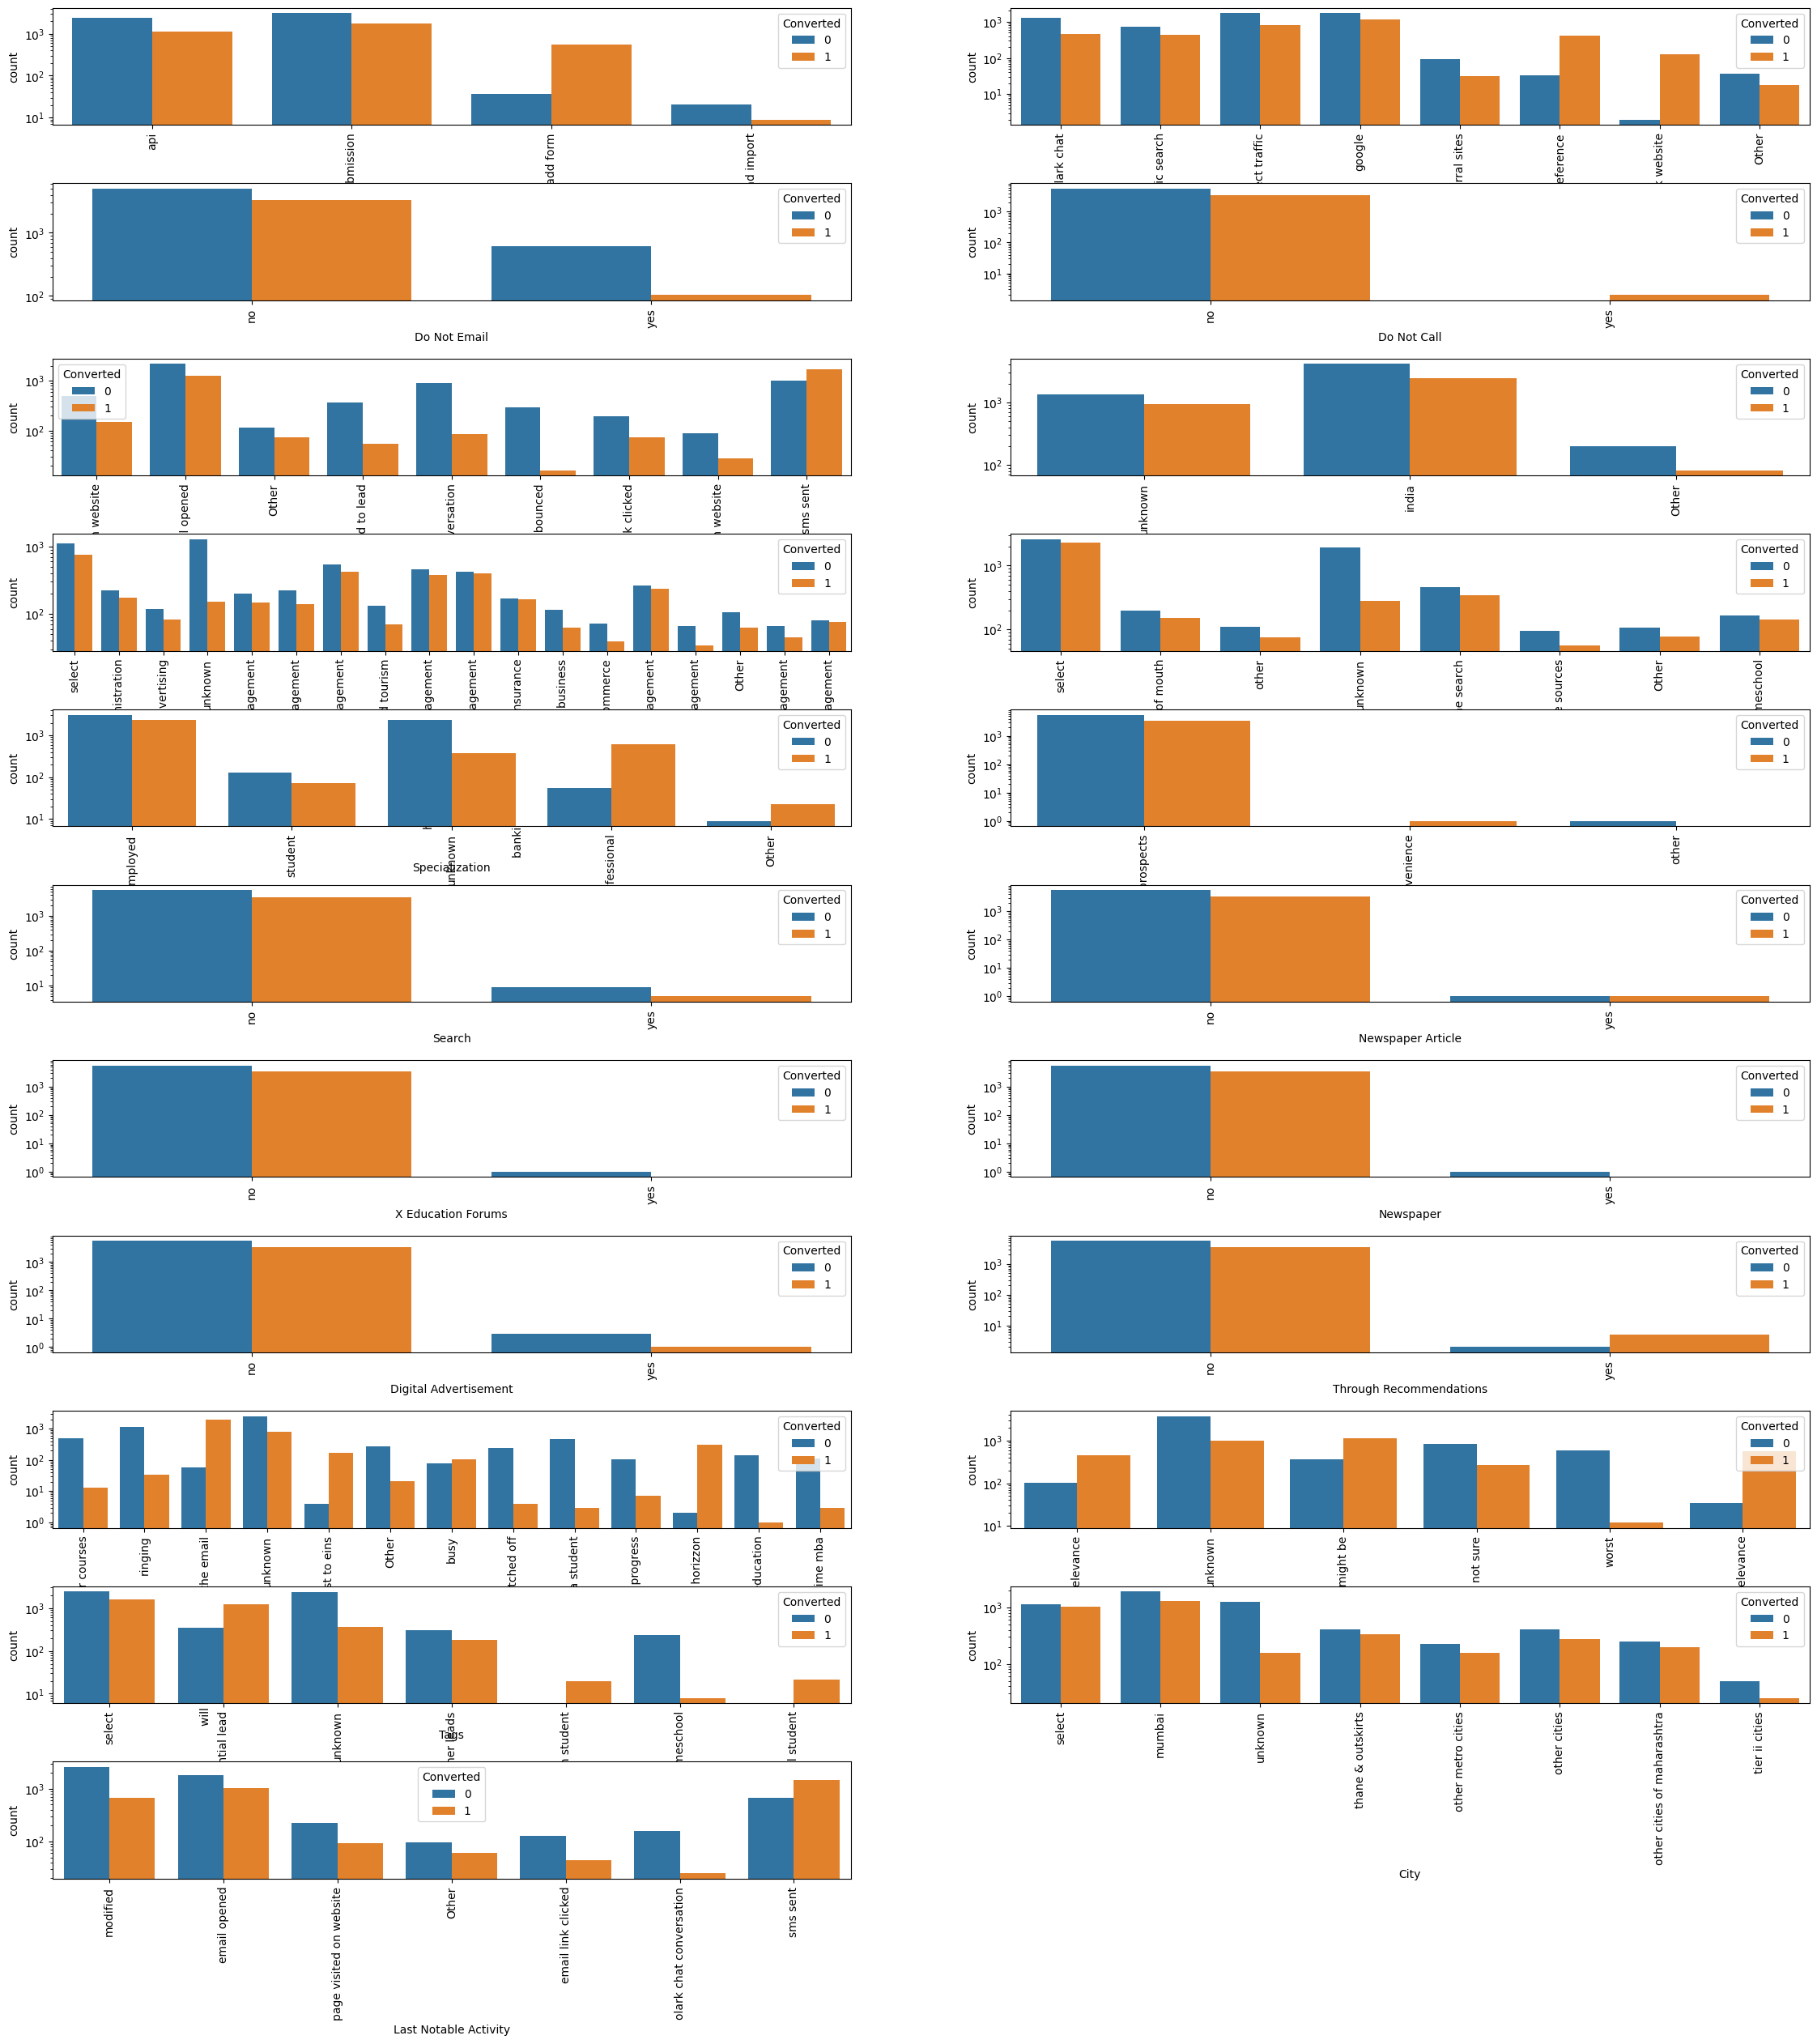

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = df_final.select_dtypes(include=['object', 'category']).columns.tolist()

plt.figure(figsize=(28, 30))

# Loop through categorical columns and plot
for idx, col in enumerate(categorical_columns, start=1):
    plt.subplot((len(categorical_columns) + 1) // 2, 2, idx)  # Adjust rows dynamically
    sns.countplot(x=col, hue='Converted', data=df_final)
    plt.yscale('log')
    plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()  # Prevent overlapping
plt.show()


#### 2.1.1. Numerical Variables

In [42]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [43]:
numerical_columns = df_final.select_dtypes(include=['int64', 'float64']).columns

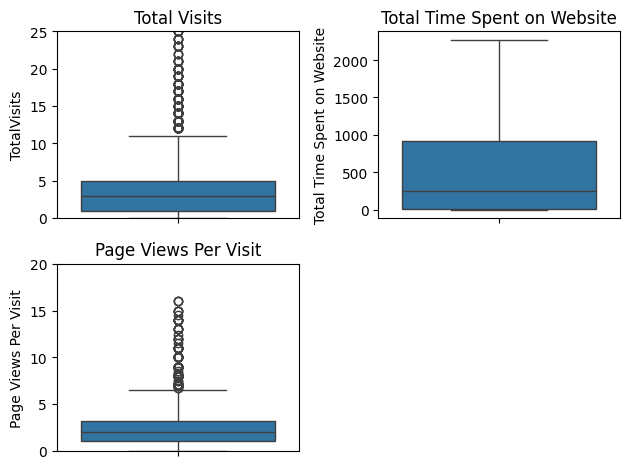

In [44]:
plt.subplot(221)
sns.boxplot(y=df_final['TotalVisits'])
plt.title('Total Visits')
plt.ylim(0, 25)

plt.subplot(222)
sns.boxplot(y=df_final['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

plt.subplot(223)
sns.boxplot(y=df_final['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.ylim(0, 20)

plt.tight_layout()
plt.show()

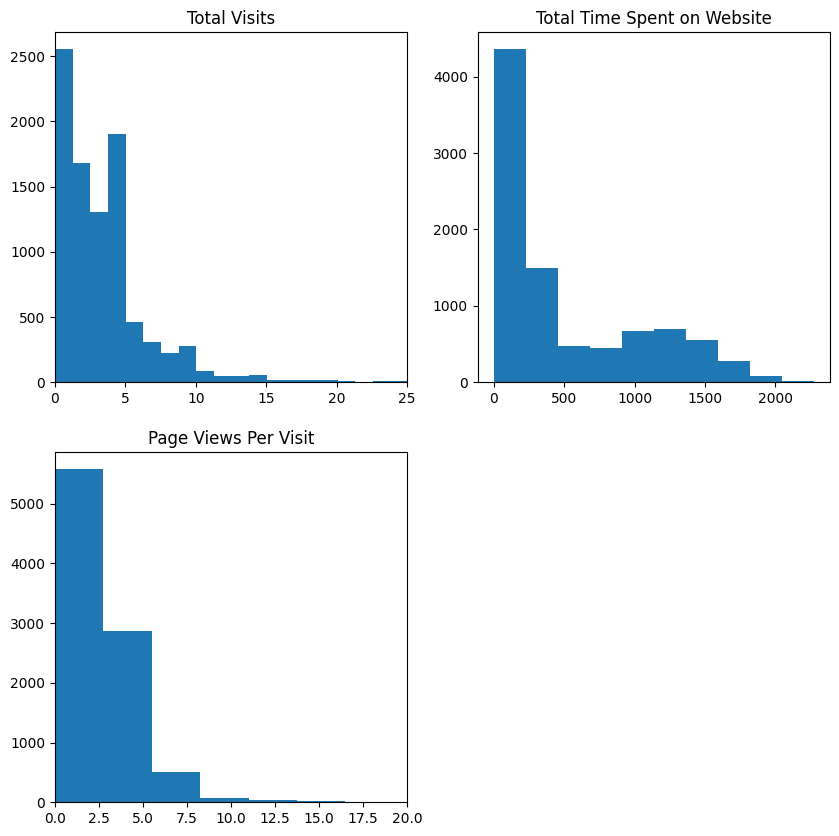

In [45]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### 2.1. Relating all the categorical variables to Converted

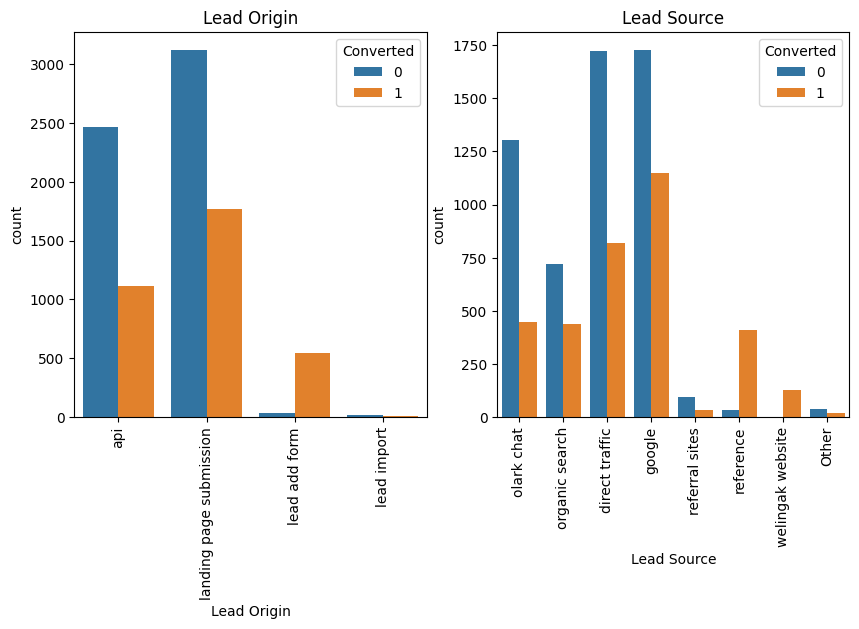

In [46]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

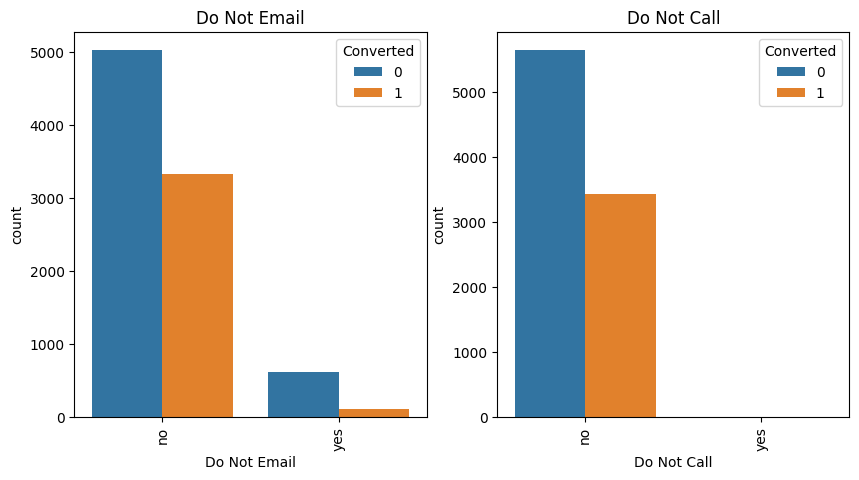

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

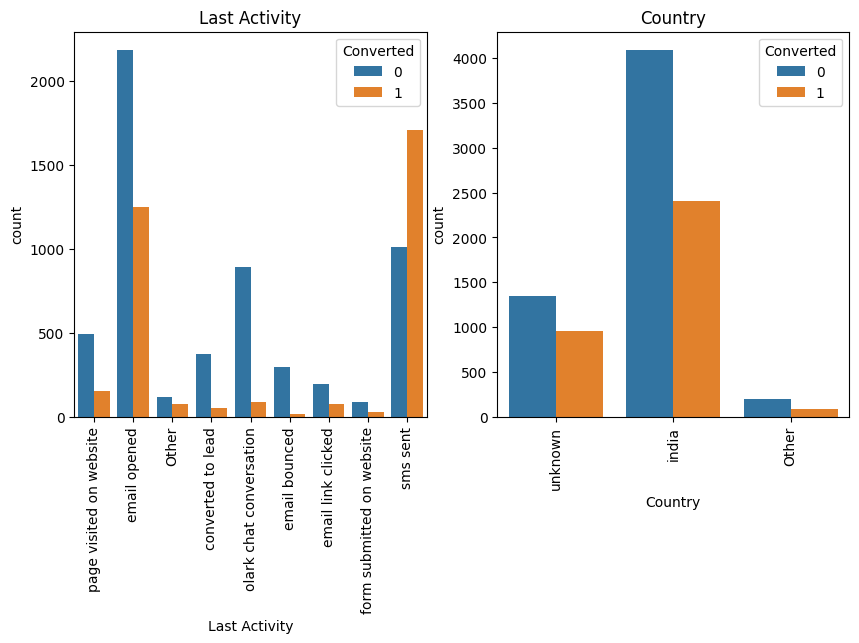

In [48]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

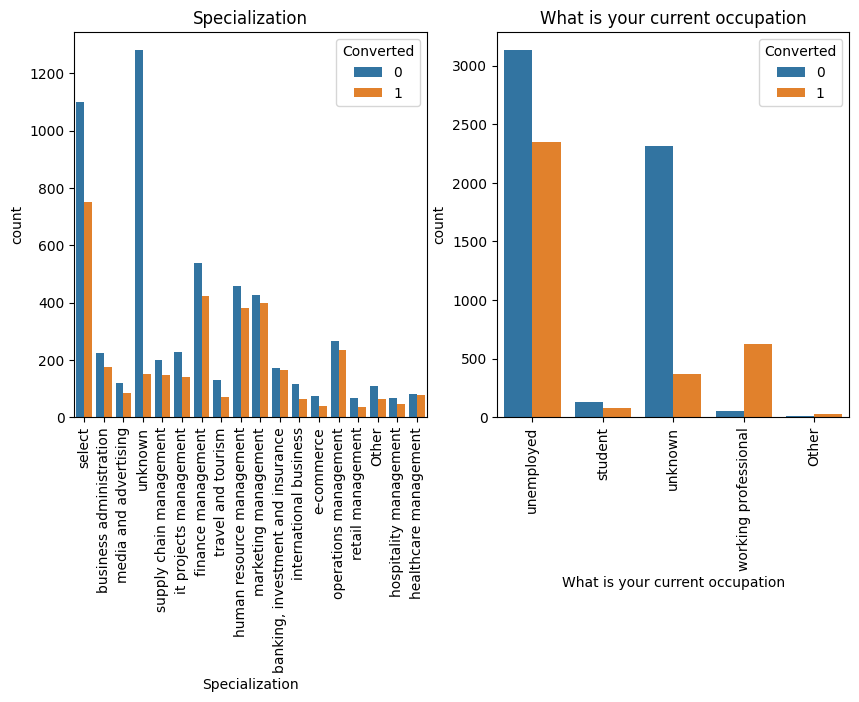

In [49]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

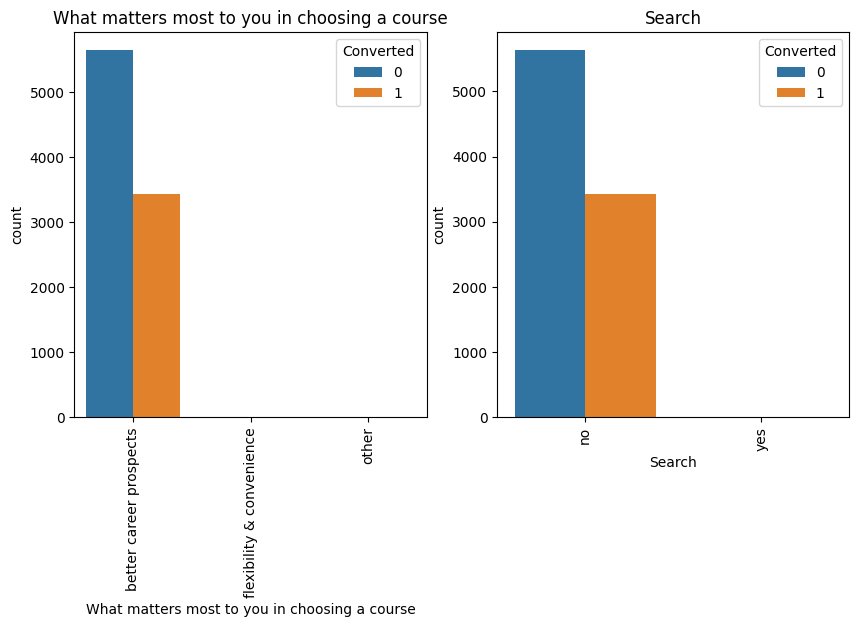

In [50]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

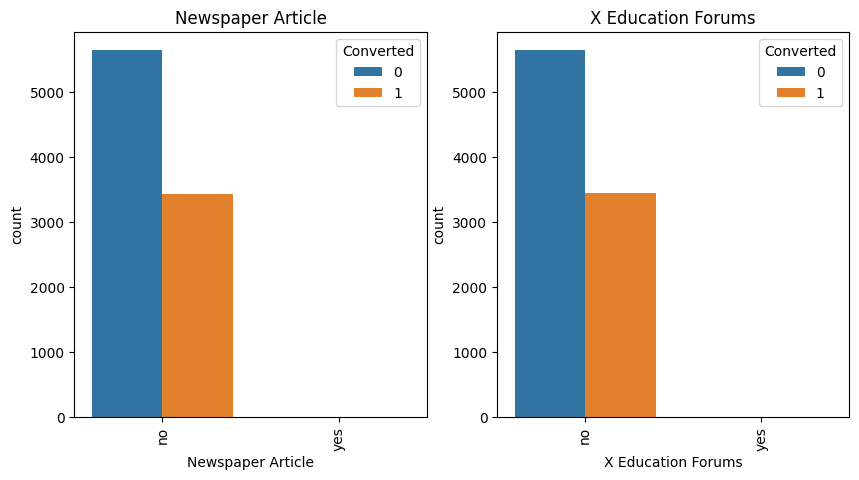

In [51]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

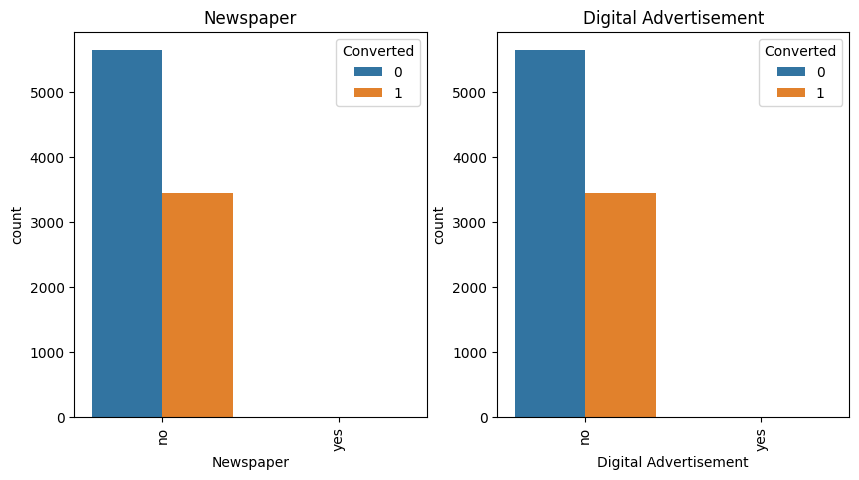

In [52]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

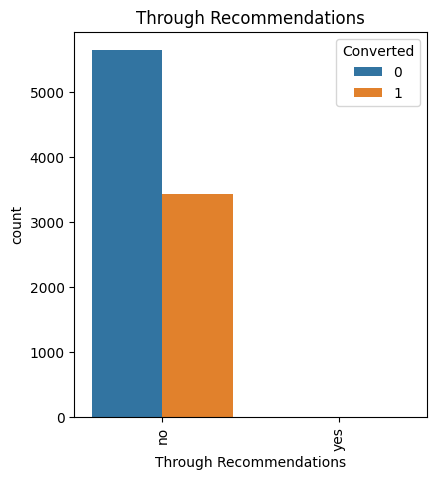

In [53]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')
plt.show()

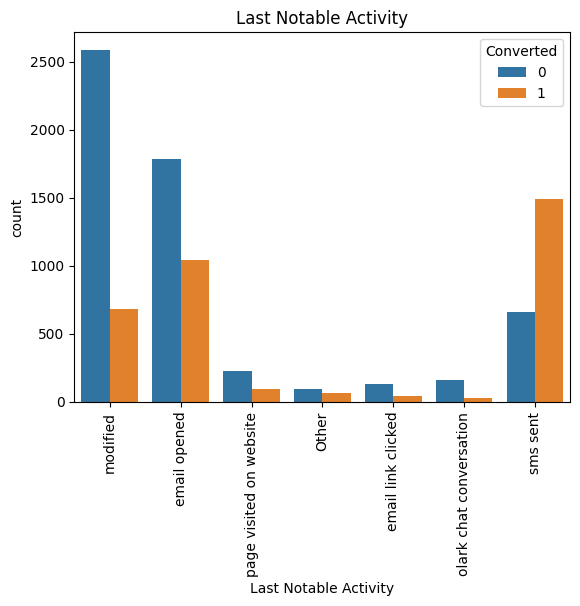

In [54]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

In [55]:
df_final.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,unknown,...,no,no,no,no,no,interested in other courses,low in relevance,select,select,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,no,no,no,no,no,ringing,unknown,select,select,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,no,no,no,no,no,will revert after reading the email,might be,potential lead,mumbai,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,Other,india,...,no,no,no,no,no,ringing,not sure,select,mumbai,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,no,no,no,no,no,will revert after reading the email,might be,select,mumbai,modified


In [56]:
df_final = df_final.replace({'yes':1, 'no':0})
df_final.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Last Notable Activity
0,api,olark chat,0,0,0,0.0,0,0.0,page visited on website,unknown,...,0,0,0,0,0,interested in other courses,low in relevance,select,select,modified
1,api,organic search,0,0,0,5.0,674,2.5,email opened,india,...,0,0,0,0,0,ringing,unknown,select,select,email opened
2,landing page submission,direct traffic,0,0,1,2.0,1532,2.0,email opened,india,...,0,0,0,0,0,will revert after reading the email,might be,potential lead,mumbai,email opened
3,landing page submission,direct traffic,0,0,0,1.0,305,1.0,Other,india,...,0,0,0,0,0,ringing,not sure,select,mumbai,modified
4,landing page submission,google,0,0,1,2.0,1428,1.0,converted to lead,india,...,0,0,0,0,0,will revert after reading the email,might be,select,mumbai,modified


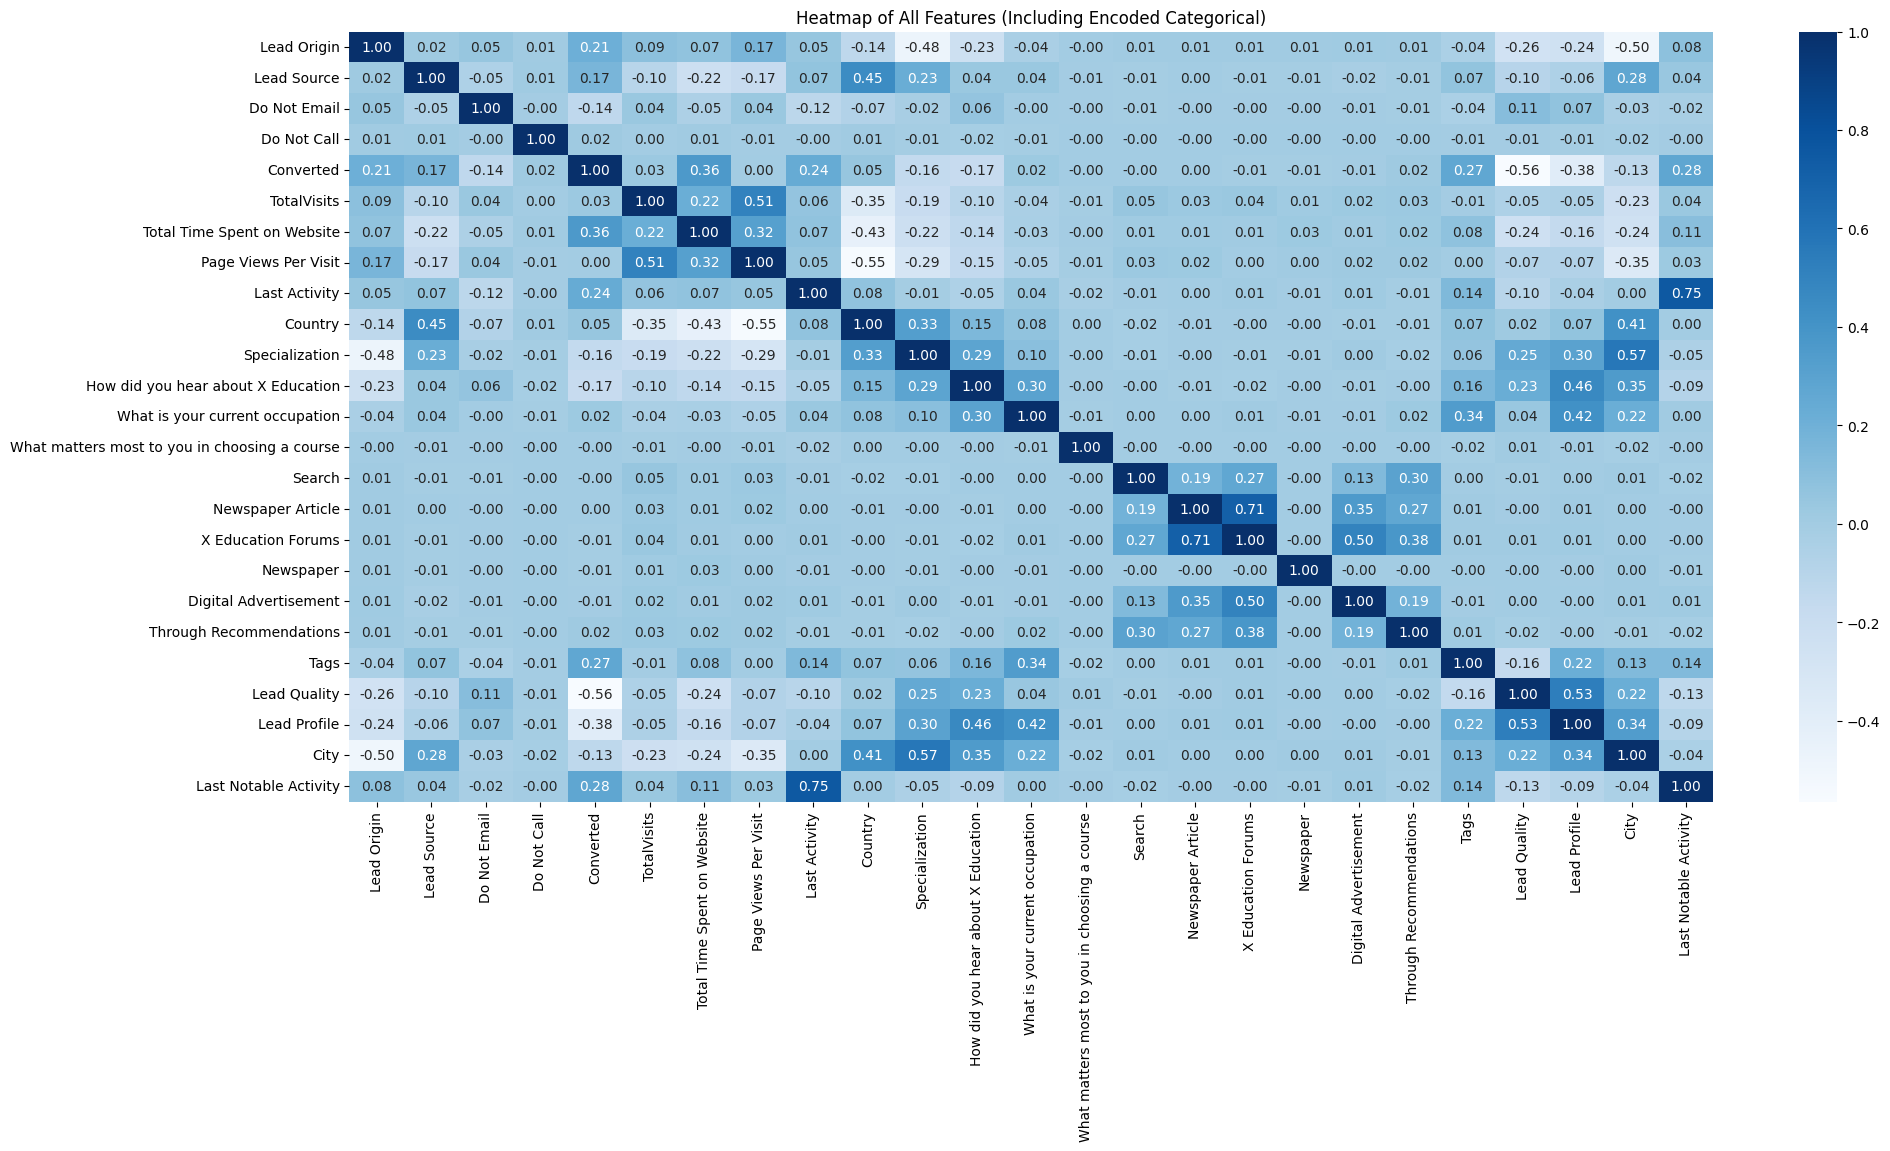

In [57]:
df_encoded = df_final.copy()
for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Plot heatmap for the entire dataset, including encoded categorical features
plt.figure(figsize=(22, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Heatmap of All Features (Including Encoded Categorical)')
plt.show()

<font color= green>___It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.___</font>

In [58]:
df_final.shape

(9074, 25)

<font color= green>___There aren't any major outliers, so moving on to analysis___</font>

## 3. Dummy Variables

In [59]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   int64  
 3   Do Not Call                                    9074 non-null   int64  
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [60]:
categorical_columns = df_final.select_dtypes(include=['object']).columns

# Convert categorical columns to dummy variables
dummy_vars = pd.get_dummies(df_final[categorical_columns], drop_first=True)

# Concatenate the dummy variables with the original dataframe
df_final_dum = pd.concat([df_final, dummy_vars], axis=1)

# Drop the original categorical columns
df_final_dum = df_final_dum.drop(columns=categorical_columns, axis=1)

# Display the final dataframe
df_final_dum.head()


,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,City_select,City_thane & outskirts,City_tier ii cities,City_unknown,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
0,0,0,0,0.0,0,0.0,0,0,0,0,...,True,False,False,False,False,False,True,False,False,False
1,0,0,0,5.0,674,2.5,0,0,0,0,...,True,False,False,False,False,True,False,False,False,False
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
3,0,0,0,1.0,305,1.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False


In [61]:
df_final_dum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 98 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9074 non-null   int64  
 1   Do Not Call                                                              9074 non-null   int64  
 2   Converted                                                                9074 non-null   int64  
 3   TotalVisits                                                              9074 non-null   float64
 4   Total Time Spent on Website                                              9074 non-null   int64  
 5   Page Views Per Visit                                                     9074 non-null   float64
 6   Search                                                                   9074

## 4. Test-Train Split

In [62]:
# Import the required library
from sklearn.model_selection import train_test_split

In [63]:
X = df_final_dum.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,City_select,City_thane & outskirts,City_tier ii cities,City_unknown,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
0,0,0,0.0,0,0.0,0,0,0,0,0,...,True,False,False,False,False,False,True,False,False,False
1,0,0,5.0,674,2.5,0,0,0,0,0,...,True,False,False,False,False,True,False,False,False,False
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
3,0,0,1.0,305,1.0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False


In [64]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [66]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,City_select,City_thane & outskirts,City_tier ii cities,City_unknown,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
1289,0,0,0.014184,0.612676,0.083333,0,0,0,0,0,...,False,True,False,False,False,True,False,False,False,False
3604,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,False,False,False,True,False,False,False,False,True,False
5584,1,0,0.042553,0.751761,0.250000,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
7679,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,False,False,False,True,True,False,False,False,False,False
7563,1,0,0.014184,0.787852,0.083333,0,0,0,0,0,...,False,True,False,False,False,False,True,False,False,False


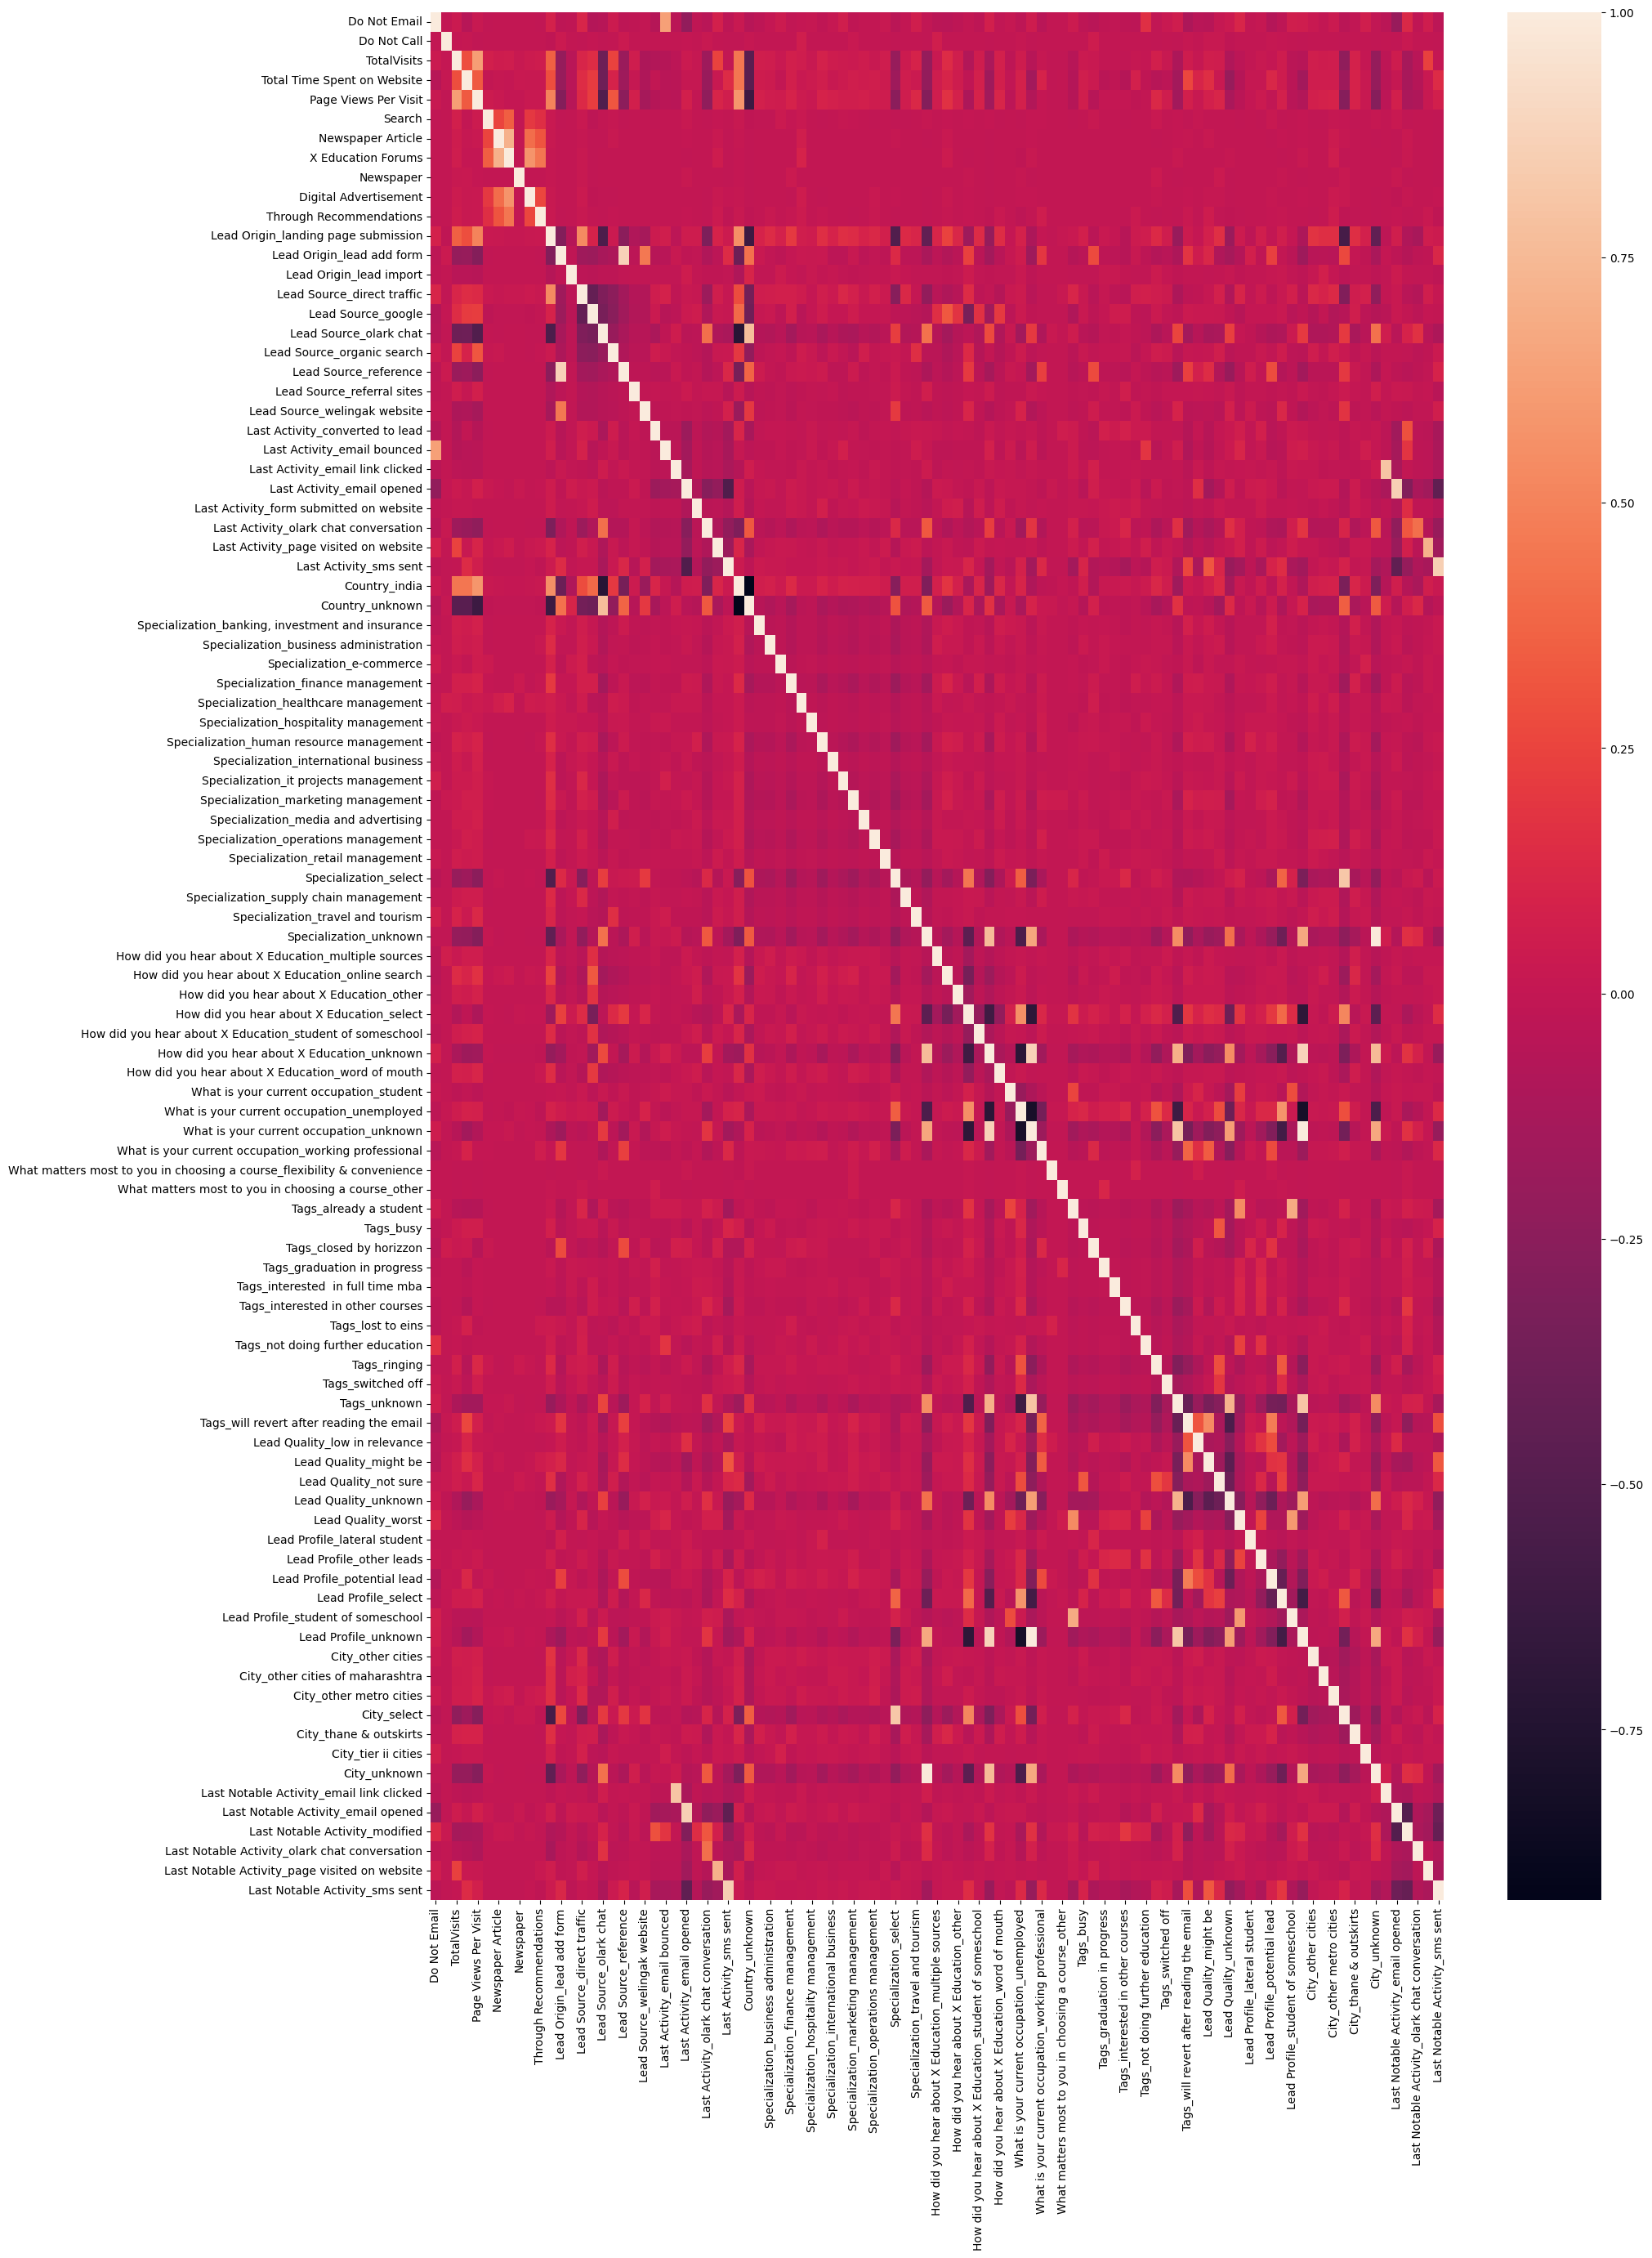

In [67]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

<font color= green>___Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE___</font>

## 5. Model Building 

In [68]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [69]:
# Import RFE
from sklearn.feature_selection import RFE

In [70]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()  # Ensure you define logreg first
rfe = RFE(estimator=logreg, n_features_to_select=15)  # Corrected syntax
rfe = rfe.fit(X_train, y_train)


In [71]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 7),
 ('Do Not Call', False, 58),
 ('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('Search', False, 54),
 ('Newspaper Article', False, 76),
 ('X Education Forums', False, 68),
 ('Newspaper', False, 69),
 ('Digital Advertisement', False, 67),
 ('Through Recommendations', False, 72),
 ('Lead Origin_landing page submission', False, 22),
 ('Lead Origin_lead add form', False, 20),
 ('Lead Origin_lead import', False, 36),
 ('Lead Source_direct traffic', False, 50),
 ('Lead Source_google', False, 49),
 ('Lead Source_olark chat', False, 59),
 ('Lead Source_organic search', False, 70),
 ('Lead Source_reference', False, 21),
 ('Lead Source_referral sites', False, 51),
 ('Lead Source_welingak website', True, 1),
 ('Last Activity_converted to lead', False, 30),
 ('Last Activity_email bounced', False, 27),
 ('Last Activity_email link clicked', False, 45),
 ('Last Activity_email opened', False, 33),
 ('Last Activi

In [72]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

<font color= green>___All the variables selected by RFE, next statistics part (p-values and the VIFs).___</font>

In [73]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [74]:
# Importing statsmodels
import statsmodels.api as sm

In [75]:
print(X_train.dtypes)
print(y_train.dtypes)

Total Time Spent on Website                      float64
Lead Source_welingak website                        bool
Last Activity_sms sent                              bool
Tags_already a student                              bool
Tags_busy                                           bool
Tags_closed by horizzon                             bool
Tags_lost to eins                                   bool
Tags_ringing                                        bool
Tags_switched off                                   bool
Tags_unknown                                        bool
Tags_will revert after reading the email            bool
Lead Quality_worst                                  bool
Lead Profile_unknown                                bool
Last Notable Activity_modified                      bool
Last Notable Activity_olark chat conversation       bool
dtype: object
int64


In [76]:
X_train = X_train.astype(int)


In [77]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1246.5
Date:                Tue, 18 Mar 2025   Deviance:                       2492.9
Time:                        15:46:25   Pearson chi2:                 1.17e+04
No. Iterations:                    19   Pseudo R-squ. (CS):             0.6101
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.9724      0.211    -14.072      0.000      -3.386      -2.558
Total Time Spent on Website                     -17.6518   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_welingak website                      3.0545      1.024      2.983      0.003       1.047       5.062
Last Activity_sms sent                            2.1807      0.120     18.171      0.000       1.945       2.416
Tags_already a student                           -1.5822      1.030     -1.536      0.124      -3.601       0.436
Tags_busy                                         2.5084      0.290      8.649      0.000       1.940       3.077
Tags_closed by horizzon                           8.5228      0.746     11.428      0.000       7.061       9.985
Tags_lost to eins                                 8.8177      0.583     15.112      0.000       7.674       9.961
Tags_ringing                                     -1.6834      0.289     -5.815      0.000      -2.251      -1.116
Tags_switched off                                -2.7896      0.745     -3.744      0.000      -4.250      -1.329
Tags_unknown                                      3.4325      0.235     14.594      0.000       2.971       3.893
Tags_will revert after reading the email          6.4899      0.272     23.844      0.000       5.956       7.023
Lead Quality_worst                               -2.1226      0.844     -2.514      0.012      -3.777      -0.468
Lead Profile_unknown                             -2.4971      0.144    -17.390      0.000      -2.779      -2.216
Last Notable Activity_modified                   -1.4857      0.125    -11.897      0.000      -1.730      -1.241
Last Notable Activity_olark chat conversation    -1.2267      0.406     -3.024      0.002      -2.022      -0.432
=================================================================================================================
"""

In [78]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_unknown,4.88
12,Lead Profile_unknown,4.63
2,Last Activity_sms sent,1.65
13,Last Notable Activity_modified,1.54
11,Lead Quality_worst,1.53
3,Tags_already a student,1.49
10,Tags_will revert after reading the email,1.36
7,Tags_ringing,1.13
1,Lead Source_welingak website,1.12
6,Tags_lost to eins,1.07


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'Total Time Spent on Website'___</font>

In [80]:
X_train.drop('Total Time Spent on Website', axis = 1, inplace = True)

In [81]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1246.5
Date:                Tue, 18 Mar 2025   Deviance:                       2493.1
Time:                        15:46:26   Pearson chi2:                 1.17e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6101
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.9728      0.211    -14.072      0.000      -3.387      -2.559
Lead Source_welingak website                      3.0545      1.024      2.983      0.003       1.047       5.062
Last Activity_sms sent                            2.1804      0.120     18.169      0.000       1.945       2.416
Tags_already a student                           -1.5762      1.029     -1.531      0.126      -3.594       0.442
Tags_busy                                         2.5089      0.290      8.650      0.000       1.940       3.077
Tags_closed by horizzon                           8.5233      0.746     11.428      0.000       7.062       9.985
Tags_lost to eins                                 8.8202      0.584     15.116      0.000       7.677       9.964
Tags_ringing                                     -1.6827      0.289     -5.812      0.000      -2.250      -1.115
Tags_switched off                                -2.7889      0.745     -3.743      0.000      -4.249      -1.328
Tags_unknown                                      3.4329      0.235     14.596      0.000       2.972       3.894
Tags_will revert after reading the email          6.4903      0.272     23.844      0.000       5.957       7.024
Lead Quality_worst                               -2.1570      0.840     -2.567      0.010      -3.804      -0.510
Lead Profile_unknown                             -2.4971      0.144    -17.391      0.000      -2.779      -2.216
Last Notable Activity_modified                   -1.4855      0.125    -11.895      0.000      -1.730      -1.241
Last Notable Activity_olark chat conversation    -1.2268      0.406     -3.025      0.002      -2.022      -0.432
=================================================================================================================
"""

In [82]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_unknown,4.88
11,Lead Profile_unknown,4.63
1,Last Activity_sms sent,1.65
12,Last Notable Activity_modified,1.54
10,Lead Quality_worst,1.53
2,Tags_already a student,1.49
9,Tags_will revert after reading the email,1.36
6,Tags_ringing,1.13
0,Lead Source_welingak website,1.12
5,Tags_lost to eins,1.07


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'Tags_already a student'___</font>

In [83]:
X_train.drop('Tags_already a student', axis = 1, inplace = True)

In [84]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1248.4
Date:                Tue, 18 Mar 2025   Deviance:                       2496.9
Time:                        15:46:26   Pearson chi2:                 1.19e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6099
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.0950      0.205    -15.090      0.000      -3.497      -2.693
Lead Source_welingak website                      3.0526      1.024      2.980      0.003       1.045       5.060
Last Activity_sms sent                            2.1972      0.120     18.297      0.000       1.962       2.433
Tags_busy                                         2.6229      0.287      9.145      0.000       2.061       3.185
Tags_closed by horizzon                           8.6504      0.744     11.627      0.000       7.192      10.109
Tags_lost to eins                                 8.9661      0.581     15.438      0.000       7.828      10.104
Tags_ringing                                     -1.5744      0.287     -5.493      0.000      -2.136      -1.013
Tags_switched off                                -2.6810      0.744     -3.603      0.000      -4.139      -1.223
Tags_unknown                                      3.5542      0.230     15.452      0.000       3.103       4.005
Tags_will revert after reading the email          6.6126      0.268     24.704      0.000       6.088       7.137
Lead Quality_worst                               -2.3863      0.807     -2.956      0.003      -3.969      -0.804
Lead Profile_unknown                             -2.5031      0.144    -17.403      0.000      -2.785      -2.221
Last Notable Activity_modified                   -1.4892      0.125    -11.919      0.000      -1.734      -1.244
Last Notable Activity_olark chat conversation    -1.2304      0.405     -3.037      0.002      -2.024      -0.436
=================================================================================================================
"""

In [85]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_unknown,4.88
10,Lead Profile_unknown,4.63
1,Last Activity_sms sent,1.65
11,Last Notable Activity_modified,1.52
8,Tags_will revert after reading the email,1.36
5,Tags_ringing,1.13
0,Lead Source_welingak website,1.12
9,Lead Quality_worst,1.09
4,Tags_lost to eins,1.07
2,Tags_busy,1.05


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation other'___</font>

In [86]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.612819
3604    0.114671
5584    0.114671
7679    0.114671
7563    0.000938
7978    0.996714
7780    0.971184
7863    0.971021
838     0.883746
708     0.883746
dtype: float64

In [87]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.12818965e-01, 1.14671321e-01, 1.14671321e-01, 1.14671321e-01,
       9.38252483e-04, 9.96714107e-01, 9.71184167e-01, 9.71020775e-01,
       8.83746020e-01, 8.83746020e-01])

In [88]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.612819
1,0,0.114671
2,0,0.114671
3,0,0.114671
4,0,0.000938


In [89]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.612819,1
1,0,0.114671,0
2,0,0.114671,0
3,0,0.114671,0
4,0,0.000938,0


## 7. Model Evaluation

In [90]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [91]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3680,  215],
       [ 213, 2243]])

In [92]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [93]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9326090379467801

<font color= green>___That's around 93% accuracy with is a very good value___</font>

In [94]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [95]:
# Calculating the sensitivity
TP/(TP+FN)

0.9132736156351792

In [96]:
# Calculating the specificity
TN/(TN+FP)

0.944801026957638

<font color= green>___With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 87%.___</font>

## 7. Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [97]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

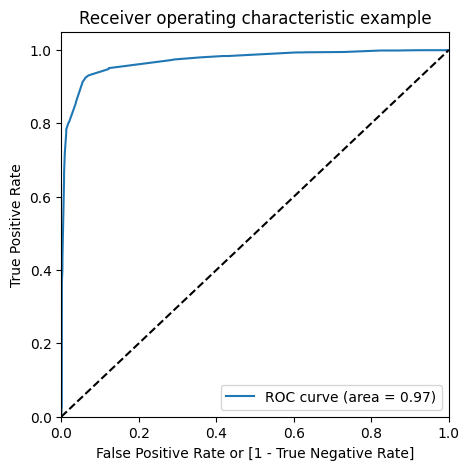

In [99]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<font color= green>___The area under ROC curve is 0.97 which is a very good value.___</font>

In [100]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.612819,1,1,1,1,1,1,1,1,0,0,0
1,0,0.114671,0,1,1,0,0,0,0,0,0,0,0
2,0,0.114671,0,1,1,0,0,0,0,0,0,0,0
3,0,0.114671,0,1,1,0,0,0,0,0,0,0,0
4,0,0.000938,0,1,0,0,0,0,0,0,0,0,0


In [101]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.815462,0.972720,0.716303
0.2,0.2,0.905369,0.947883,0.878562
0.3,0.3,0.932609,0.924267,0.937869
0.4,0.4,0.932609,0.913274,0.944801
0.5,0.5,0.932609,0.913274,0.944801
0.6,0.6,0.920800,0.854235,0.962773
0.7,0.7,0.911667,0.803339,0.979974
0.8,0.8,0.911982,0.802117,0.981258
0.9,0.9,0.887577,0.724349,0.990501


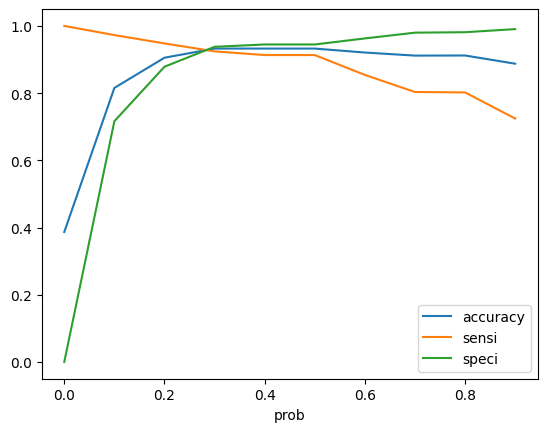

In [102]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<font color= green>___From the graph it is visible that the optimal cut off is at 0.35.___</font>

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.612819,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.114671,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.114671,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.114671,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.000938,0,1,0,0,0,0,0,0,0,0,0,0


In [104]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9324515824279641

In [105]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3660,  235],
       [ 194, 2262]])

In [106]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [107]:
# Calculating the sensitivity
TP/(TP+FN)

0.9210097719869706

In [108]:
# Calculating the specificity
TN/(TN+FP)

0.9396662387676509

<font color= green>___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 93%.___</font>

## 8. Prediction on Test set

In [109]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [110]:
# Substituting all the columns in the final train model
col = X_train.columns

In [111]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Lead Source_welingak website,Last Activity_sms sent,Tags_busy,Tags_closed by horizzon,Tags_lost to eins,Tags_ringing,Tags_switched off,Tags_unknown,Tags_will revert after reading the email,Lead Quality_worst,Lead Profile_unknown,Last Notable Activity_modified,Last Notable Activity_olark chat conversation
8308,1.0,False,False,False,False,False,False,False,False,False,False,False,True,False
7212,1.0,False,True,False,False,False,False,False,False,True,False,False,False,False
2085,1.0,True,False,False,False,False,False,False,True,False,False,False,False,False
4048,1.0,False,True,False,False,False,False,False,True,False,False,False,False,False
4790,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,False,False,False,False,False,False,False,False,True,False,False,True,False
8179,1.0,False,True,False,False,False,False,False,True,False,False,True,True,False
6236,1.0,False,False,False,False,False,False,False,True,False,False,True,False,False
5240,1.0,False,True,False,False,False,False,False,False,True,False,False,False,False


In [112]:
print(type(res))


<class 'statsmodels.genmod.generalized_linear_model.GLMResultsWrapper'>


In [113]:
print(type(X_test_sm))
print(X_test_sm.shape)


<class 'pandas.core.frame.DataFrame'>
(2723, 14)


In [114]:
print(type(X_test_sm))
print(X_test_sm.dtypes)  # If it's a DataFrame, check column data types
X_test_sm = X_test_sm.astype(int)

<class 'pandas.core.frame.DataFrame'>
const                                            float64
Lead Source_welingak website                        bool
Last Activity_sms sent                              bool
Tags_busy                                           bool
Tags_closed by horizzon                             bool
Tags_lost to eins                                   bool
Tags_ringing                                        bool
Tags_switched off                                   bool
Tags_unknown                                        bool
Tags_will revert after reading the email            bool
Lead Quality_worst                                  bool
Lead Profile_unknown                                bool
Last Notable Activity_modified                      bool
Last Notable Activity_olark chat conversation       bool
dtype: object


In [115]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

In [116]:
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.010108
1,1,0.996714
2,1,0.971021
3,1,0.934405
4,0,0.043312


In [117]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.010108,0
1,1,0.996714,1
2,1,0.971021,1
3,1,0.934405,1
4,0,0.043312,0
...,...,...,...
2718,1,0.883746,1
2719,0,0.208193,0
2720,0,0.114671,0
2721,1,0.996714,1


In [118]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9280205655526992

In [119]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1624,  120],
       [  76,  903]])

In [120]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [121]:
# Calculating the sensitivity
TP/(TP+FN)

0.9223697650663942

In [122]:
# Calculating the specificity
TN/(TN+FP)

0.9311926605504587

<font color= green>___With the current cut off as 0.35 we have accuracy of around 92%, sensitivity of around 92% and specificity of around 93%.___</font>

## 9. Precision-Recall

In [123]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3680,  215],
       [ 213, 2243]])

In [124]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9125305126118796

In [125]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9132736156351792

<font color= green>___With the current cut off as 0.35 we have Precision around 91% and Recall around 91%___</font>

### 9.1. Precision and recall tradeoff

In [126]:
from sklearn.metrics import precision_recall_curve

In [127]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [128]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

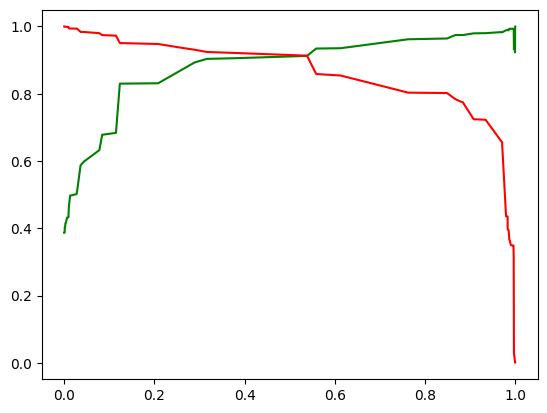

In [129]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [130]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.612819,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.114671,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.114671,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.114671,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.000938,0,1,0,0,0,0,0,0,0,0,0,0


In [131]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9326090379467801

In [132]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3680,  215],
       [ 213, 2243]])

In [133]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [134]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.9125305126118796

In [135]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.9132736156351792

<font color= green>___With the current cut off as 0.41 we have Precision around 91% and Recall around 91%___</font>

## 10. Prediction on Test set

In [136]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.010108
1,1,0.996714
2,1,0.971021
3,1,0.934405
4,0,0.043312


In [137]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.010108,0
1,1,0.996714,1
2,1,0.971021,1
3,1,0.934405,1
4,0,0.043312,0
...,...,...,...
2718,1,0.883746,1
2719,0,0.208193,0
2720,0,0.114671,0
2721,1,0.996714,1


In [138]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9302240176276166

In [139]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1635,  109],
       [  81,  898]])

In [140]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [141]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.8917576961271102

In [142]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.9172625127681308

<font color= green>___With the current cut off as 0.41 we have Precision around 89% and Recall around 91%___</font>

### Conclusion 

The key factors influencing potential buyers, ranked from most to least important, are:
1. The total duration spent on the website.
2. The overall number of visits.
3. The lead source, particularly when it comes from:
  - Google
  - Direct traffic
  - Organic search
  - Welingak website
4. The last recorded activity, specifically:
  - SMS interactions
  - Olark chat conversations
5. The lead origin being from a Lead Ad format.
6. The individual's current occupation being a working professional.
Considering these factors, X Education has a strong opportunity to convert nearly all
potential buyers into actual customers, significantly boosting their course enrollments